In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = (9, 4)  # this sets the figure size for all figures that you create inside this notebook
plt.close("all")  # this closes all open figures

In [15]:
bikes = pd.read_csv("../data/bikesharing/data.csv")
bikes["timestamp"] = pd.to_datetime(bikes["timestamp"],  format="%Y-%m-%d %H:%M:%S")
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


Column description: 

- "timestamp" - timestamp field for grouping the data
- "cnt" - the count of a new bike shares
- "t1" - real temperature in C
- "t2" - temperature in C "feels like"
- "hum" - humidity in percentage
- "windspeed" - wind speed in km/h
- "weathercode" - category of the weather
- "isholiday" - boolean field - 1 holiday / 0 non holiday
- "isweekend" - boolean field - 1 if the day is weekend
- "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

# Exercise 1) Scatter plot

a) create a figure with one axis instance. You can either use plt.figure() or use plt.subplots(). Get comfortable with both methods 

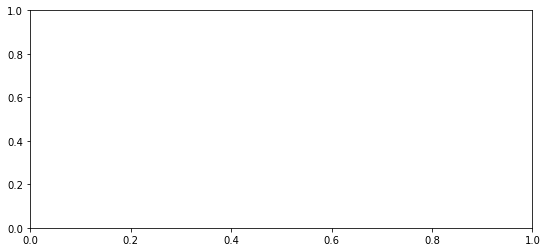

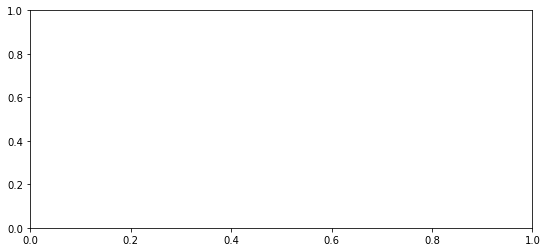

In [16]:
# first approach
fig1, ax = plt.subplots(nrows=1, ncols=1)
# fig, ax = plt.subplots()  # this is equivalent to the above line

# second approach
fig2 = plt.figure()
ax = fig2.add_subplot(111)  # add axis to the specified figure instance
# ax = plt.subplot(111) # this adds an axis element to the current figure instance (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)

b) create a scatter plot where you plot the humidity (hum) vs the real temperature (t1) column. HINT: you can show the figure by calling the figure instance at the end of the cell

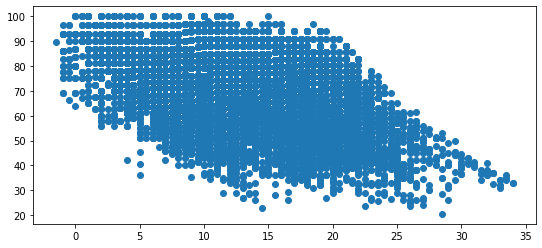

In [17]:
fig, ax = plt.subplots()
ax.scatter(bikes["t1"], bikes["hum"])

c) label the x and y axis with their respective names. HINT: use the .set_xlabel(x_name) and .set_ylabel(x_name) label methods

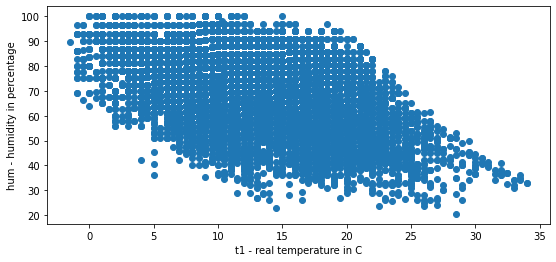

In [19]:
ax.set_xlabel("t1 - real temperature in C")  # is prefered when you want to discuss this plot with other people who are not familar with the column names
ax.set_ylabel("hum - humidity in percentage")
fig

d) give the axis instance a title. HINT: use .set_title(axis_title) 

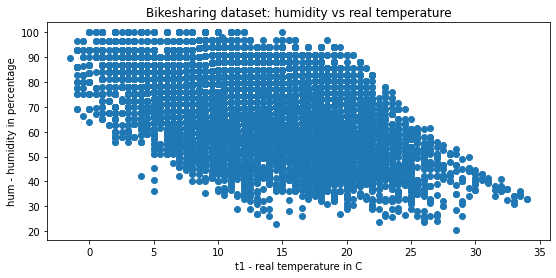

In [20]:
ax.set_title("Bikesharing dataset: humidity vs real temperature")
fig

e) save your figure as a .png file. HINT: have a look at the matplotlib documentation (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)

In [23]:
# plt.savefig("hum_vs_temp_scatter.png")  # save the current open figure
fig.savefig("hum_vs_temp_scatter.png")  # saves figure fig
# fig1.savefig("empty_figure.png")  # what happens if you run this code? 

# Exercise 2) Line plot

a) use a lineplot to visualize the count of new bike shares (cnt column) before April 2015. HINT: you need to subset the dataframe by using the timestamp column 

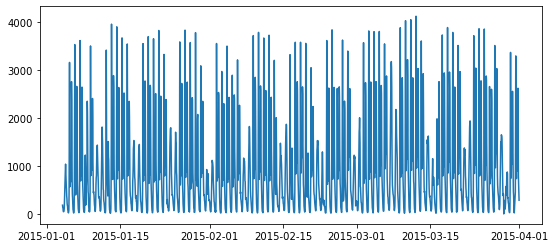

In [31]:
fig, ax = plt.subplots()
bikes_sub = bikes[bikes["timestamp"] < pd.to_datetime("2015-04-01")].copy()   
# bikes_sub = bikes[bikes["timestamp"] < "2015-04-01"].copy()  # you can also a string to index the timestamp column even though the elements are datetime instances

ax.plot(bikes_sub["timestamp"], bikes_sub["cnt"])

b) place a red marker on each point where the respective timestamp belongs to the weekend (is_weekend == 1)
1. identify the rows where is_weekend == 1 (i.e. create a mask)
2. use a scatter plot to visualize the points that are observed on the weekend. HINT: (x=timestamp, y=cnt) and for controlling the marker size and color see (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

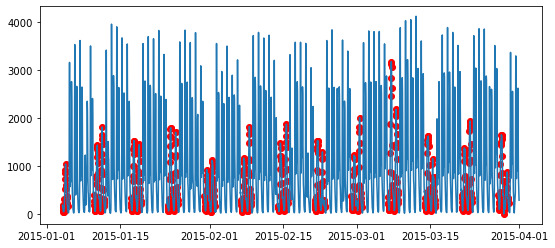

In [32]:
bikes_sub_we = bikes_sub[bikes_sub["is_weekend"] == 1].copy()
# bikes_sub_we = bikes_sub.query("is_weekend == 1").copy()  # you can also use query to subset dataframes (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html)

ax.scatter(bikes_sub_we["timestamp"], bikes_sub_we["cnt"], c="red")
fig

In [33]:
# interesting it seems that people use bikes more frequently during weekdays (at least based on the data before April 2015). this is also confirmed by the following means and medians

In [39]:
bikes_sub.groupby("is_weekend")["cnt"].agg(["mean", "median"])  

,mean,median
is_weekend,,
0.0,952.618758,766
1.0,625.018364,392


c) what happens if you use .plot(...) instead of .scatter(...) as in b). HINT: recreate the figure that you created in exercise 2a)

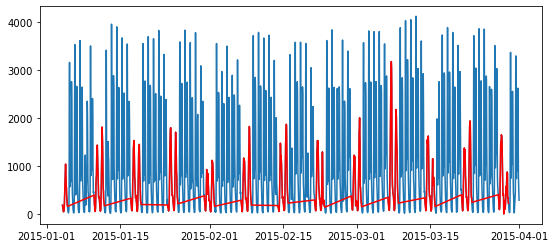

In [41]:
fig, ax = plt.subplots()
ax.plot(bikes_sub["timestamp"], bikes_sub["cnt"])
ax.plot(bikes_sub_we["timestamp"], bikes_sub_we["cnt"], c="red")

# you should see that the lineplot interpolates (draws a straight line) between each weekend, given the false impression that you actually plotted some values that occur during weekdays

# Exercise 3) Pie chart

### Let's use a pie chart to get a feeling about the distribution of the weather_code column 

a) get the counts of occurences for each unique value in the weather_code column. HINT: use value_counts

In [42]:
counts = bikes["weather_code"].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

b) use the .pie(...) method of an axis instance to visualize the output of the previous cell. HINT: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

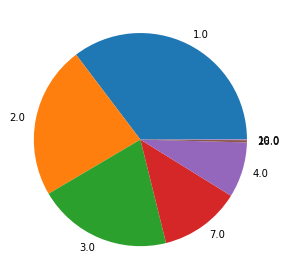

In [55]:
fig, ax = plt.subplots()
ax.pie(counts.values, labels=counts.index)
# ax.pie(counts.values, labels=counts.index, autopct='%1.1f%%', shadow=True, startangle=90) # one that looks a bit nicer
plt.tight_layout()